In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

In [2]:
plt.style.use('dark_background')

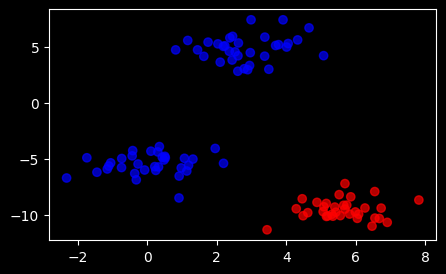

In [3]:
colors =("#FF0000", '#0000FF')
cm_bright = ListedColormap(colors)

X, y = make_blobs(n_samples=100, random_state=10)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1],c=y,cmap=cm_bright,alpha=0.7);

In [4]:
k = 3
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [5]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

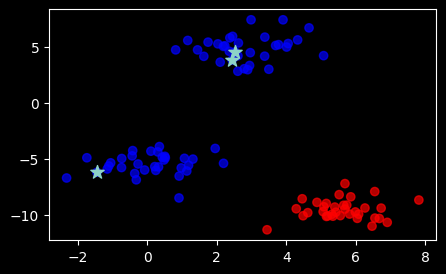

In [6]:
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1],c=y,cmap=cm_bright,alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);

In [7]:
colors = ['green', 'orange', 'red']

def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [8]:
centroids, clusters = KMeans(X)
centroids

stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

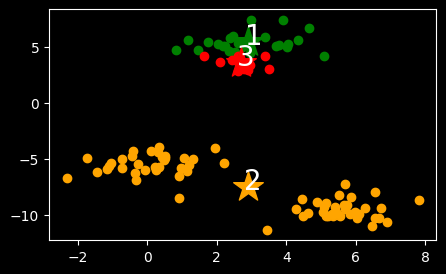

In [9]:
plt.figure(figsize=(5, 3))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

#Independent implementation of KMeans++

In [10]:
from sklearn.cluster import kmeans_plusplus

centroids_pp, centroids_ids = kmeans_plusplus(X, n_clusters=3, random_state=0)
centroids_pp, centroids_ids

(array([[ 4.05619693,  5.32231077],
        [ 1.13730861, -6.0760439 ],
        [ 5.99156553, -9.73238127]]),
 array([44, 64, 46]))

In [11]:
X[centroids_ids]

array([[ 4.05619693,  5.32231077],
       [ 1.13730861, -6.0760439 ],
       [ 5.99156553, -9.73238127]])

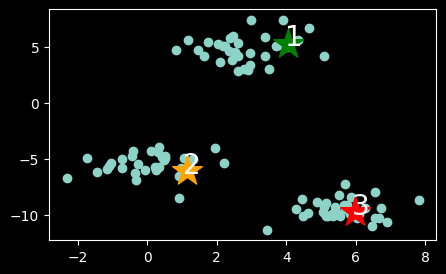

In [12]:
plt.figure(figsize=(5, 3))

plt.scatter(X[:, 0], X[:, 1])

for i, centr in enumerate(centroids_pp):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [13]:
def plot_data(X, centroids):
    plt.figure(figsize=(5, 3))

    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], marker='*',
                label='previous centroids',s=200, edgecolors='green')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], marker='*',
                label='new centroid', s=200, edgecolors='red')

    plt.legend()
    plt.show()

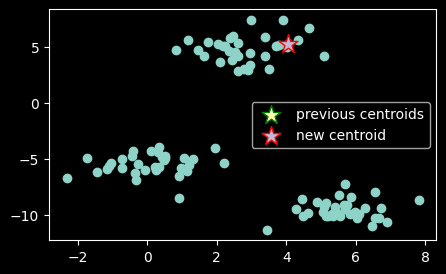

In [14]:
centroids = []
centroids.append(X[centroids_ids[0]])
plot_data(X, np.array(centroids))

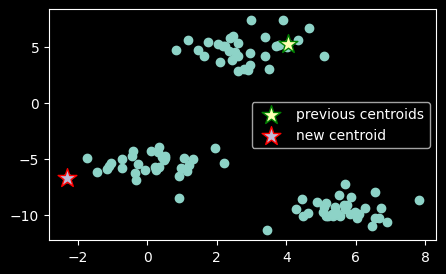

In [15]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    obj_ind = distances.argmax()

next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [16]:
dists = []

for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    dists.append(distances.min())

dists[:10]

[0.0,
 3.3648972729747024,
 2.1863863808352844,
 8.76547114399139,
 2.0234542899343846,
 1.3199796359180924,
 9.11584837953402,
 3.103801452730353,
 0.2936905729075689,
 8.033021812744863]

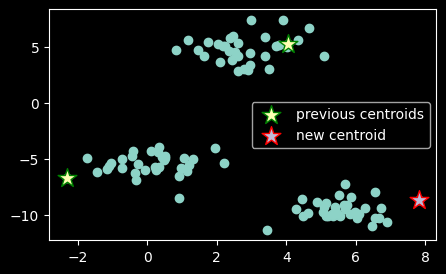

In [18]:
obj_ind = np.array(dists).argmax()
next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [19]:
centroids

[array([4.05619693, 5.32231077]),
 array([-2.32496308, -6.6999964 ]),
 array([ 7.82111653, -8.66750208])]

In [20]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    plot_data(X, np.array(centroids))


    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

        plot_data(X, np.array(centroids))

    return centroids

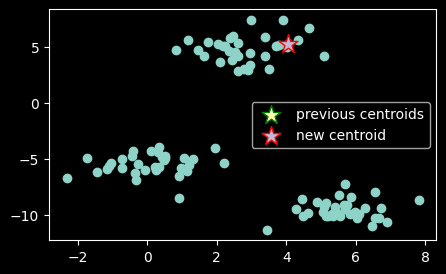

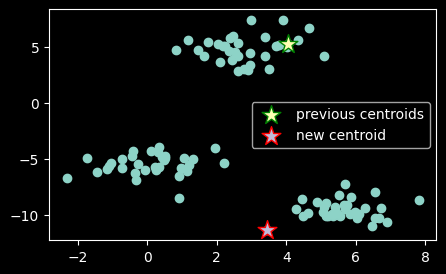

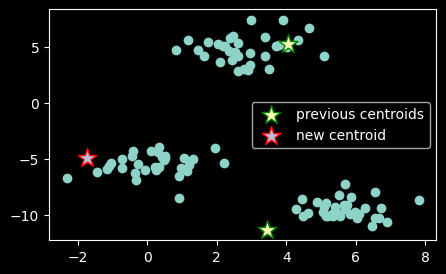

In [21]:
centroids = kmeanspp(X, k=3)

In [22]:
centroids

[array([4.05619693, 5.32231077]),
 array([  3.44868458, -11.32833331]),
 array([-1.74093095, -4.89176978])]

In [23]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        np.random.seed(seed)
        centroid_ids = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [24]:
centroids, clusters = KMeans(X, centroids=centroids)

stopping at iter 2


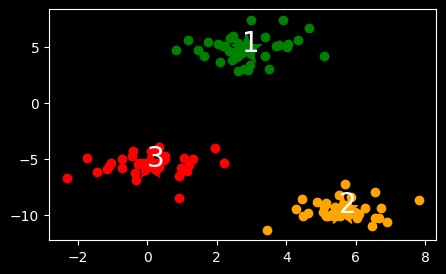

In [25]:
plt.figure(figsize=(5, 3))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);